In [14]:
import numpy as np
import pandas as pd
from plotnine import *
from plotnine.data import mpg

In [15]:
categ_table = (np.round(pd.value_counts(mpg['class']), 0)).astype(int)

sort_table = categ_table.sort_values(ascending=False)

ndeep = 10
a = np.arange(1, ndeep + 1, 1)
b = np.arange(1, np.ceil(sort_table.sum() / ndeep) + 1, 1)
X, Y = np.meshgrid(a, b)
df_grid = pd.DataFrame({'x': X.flatten(), 'y': Y.flatten()})

category = np.repeat(sort_table.index, sort_table[:])
df_grid = df_grid.loc[np.arange(0, len(category)), :]

df_grid['category'] = pd.Categorical(category,
                                     categories=sort_table.index,
                                     ordered=False)

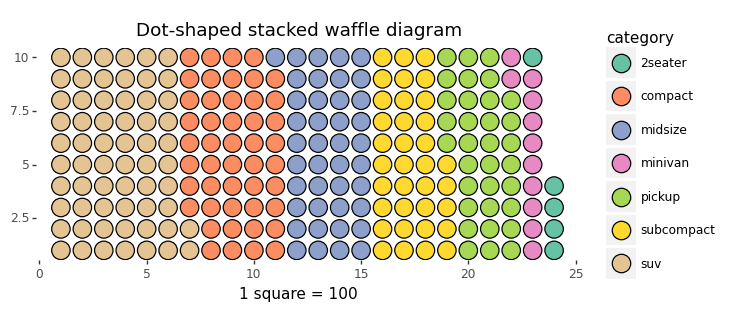

In [16]:
base_plot = (ggplot(df_grid, aes(x='y', y='x', fill='category')) +
             #geom_tile(color = "white", size = 0.25) +
             geom_point(color="black", shape='o', size=7) +
             coord_fixed(ratio=1) +
             xlab("1 square = 100") +
             ylab("") +
             scale_fill_brewer(type='qual', palette="Set2") +
             theme(panel_background=element_blank(),
                   legend_position="right",
                   figure_size=(7, 7),
                   dpi=100) +
             ggtitle('Dot-shaped stacked waffle diagram'))

print(base_plot)

In [17]:
nrows = 10
categ_table = (np.round(pd.value_counts(mpg['class']) * ((nrows * nrows) / (len(mpg['class']))), 0)).astype(int)
sort_table = categ_table.sort_values(ascending=False)
a = np.arange(1, nrows + 1, 1)
b = np.arange(1, nrows + 1, 1)
X, Y = np.meshgrid(a, b)
df_grid = pd.DataFrame({'x': X.flatten(), 'y': Y.flatten()})
df_grid['category'] = pd.Categorical(np.repeat(sort_table.index, sort_table[:]),
                                     categories=sort_table.index, ordered=False)

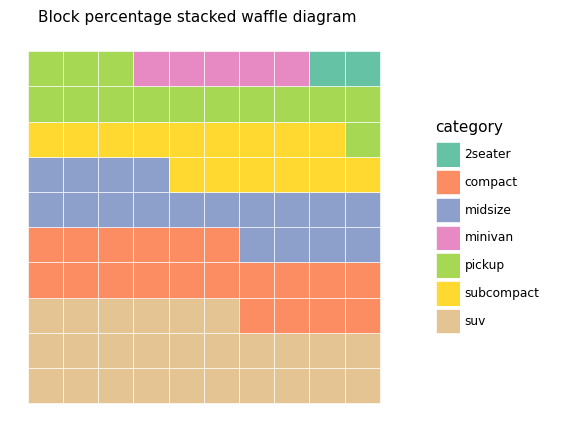

In [18]:
base_plot = (ggplot(df_grid, aes(x='x', y='y', fill='category')) +
             geom_tile(color="white", size=0.25) +
             #geom_point(color = "black",shape='o',size=13) +
             coord_fixed(ratio=1) +
             scale_fill_brewer(type='qual', palette="Set2") +
             theme_void() +
             theme(panel_background=element_blank(),
                   legend_position="right",
                   aspect_ratio=1,
                   figure_size=(5, 5),
                   dpi=100) +
             ggtitle('Block percentage stacked waffle diagram'))
print(base_plot)